# Дипломная работа

## Список заданий

1. Загрузите файл HR.csv в pandas dataframe
2. Рассчитайте основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение)
3. Рассчитайте и визуализировать корреляционную матрицу для количественных переменных. 
Определите две самые скоррелированные и две наименее скоррелированные переменные.
4. Рассчитайте сколько сотрудников работает в каждом департаменте.
5. Показать распределение сотрудников по зарплатам.
6. Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности.
7. Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким
окладом.
8. Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности):
- Доля сотрудников с повышением за последние 5 лет
- Средняя степень удовлетворенности
- Среднее количество проектов
9. Разделить данные на тестовую и обучающую выборки Построить модель LDA, предсказывающую уволился ли сотрудник на основе 
имеющихся факторов (кроме department и salary). Оценить качество модели на тестовой выборки.
10. Загрузить jupyter notebook с решение на github и прислать ссылку

## Список полей

1. satisfaction_level - Уровень удовлетворенности работой
2. Last_evaluation - Время с момента последней оценки в годах
3. number_projects - Количество проектов, выполненных за время работы
4. average_monthly_hours - Среднее количество часов на рабочем месте в месяц
5. time_spend_company - Стаж работы в компании в годах
6. work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником
7. left - уволился ли сотрудник
8. promotion_last_5years - повышался ли сотрудник за последние пять лет
9. department - отдел в котором работает сотрудник
10. salary - относительный уровень зарплаты

In [2]:
# импортируем необходимые модули


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams
from scipy import stats
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

In [3]:
# Дипломная работа Задание 1
"""
1. Загрузите файл HR.csv в pandas dataframe

"""
url="https://drive.google.com/file/d/1INgo03nal-vwFJe7Lec5vOUtOwfJdUr1/view?usp=sharing"
url="https://drive.google.com/uc?id=" + url.split('/')[-2]
data = pd.read_csv(url)
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
# Дипломная работа Задание 2
"""
2. Рассчитайте основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение)
"""
data = data.rename(columns = {"average_montly_hours": "average_monthly_hours"})  # переименовал, чтобы корректно называлось
data[["satisfaction_level", "last_evaluation", "number_project", "average_monthly_hours", "time_spend_company"]].describe()
# базовые статистики по числовым столбцам

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233
std,0.248631,0.171169,1.232592,49.943099,1.460136
min,0.090000,0.360000,2.000000,96.000000,2.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000


In [5]:
# посмотрим на распределение в столбцах, которые содержат категориальные данные, пусть и выраженные числами.

print(data["Work_accident"].value_counts())
print(data["left"].value_counts())
print(data["promotion_last_5years"].value_counts())
print(data["department"].value_counts())
print(data["salary"].value_counts())

0    12830
1     2169
Name: Work_accident, dtype: int64
0    11428
1     3571
Name: left, dtype: int64
0    14680
1      319
Name: promotion_last_5years, dtype: int64
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64
low       7316
medium    6446
high      1237
Name: salary, dtype: int64


In [6]:
# Дипломная работа Задание 3
"""
Рассчитайте и визуализировать корреляционную матрицу для количественных переменных. 
Определите две самые скоррелированные и две наименее скоррелированные переменные.
"""

rcParams['figure.figsize'] = 11,7
# рассчитаем коэффициенты корреляции по количественным переменным
data[["satisfaction_level", "last_evaluation", "number_project", "average_monthly_hours", "time_spend_company"]].corr()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786
average_monthly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000


<AxesSubplot:>

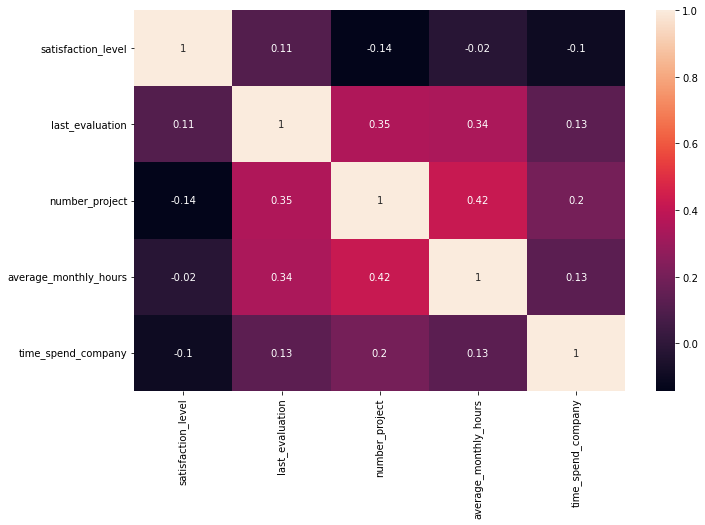

In [7]:
# используя тепловую карту, построим визуализацию корреляции
sns.heatmap(data[["satisfaction_level", "last_evaluation", "number_project", "average_monthly_hours", "time_spend_company"]].corr(),
            annot=True)

# 2 наиболее скоррелированные переменные - average_monthly_hours и number_project
# 2 наименее скоррелированные переменные - average_monthly_hours и satisfaction_level, коэффициент корреляции наиболее 
# близок к нулю.

In [8]:
# Дипломная работа Задание 4
"""
Рассчитайте сколько сотрудников работает в каждом департаменте.
"""
data.department.value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

Text(0.5, 1.0, 'Распределение сотрудников по уровню зарплаты')

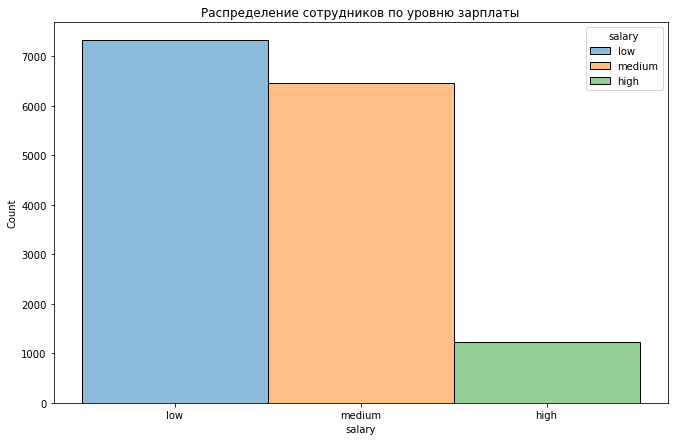

In [9]:
# Дипломная работа Задание 5
"""
Показать распределение сотрудников по зарплатам.
"""
# построим гистограмму распределения сотрудников по заработной плате
sns.histplot(data=data, x=data.salary, hue='salary')
plt.title("Распределение сотрудников по уровню зарплаты")

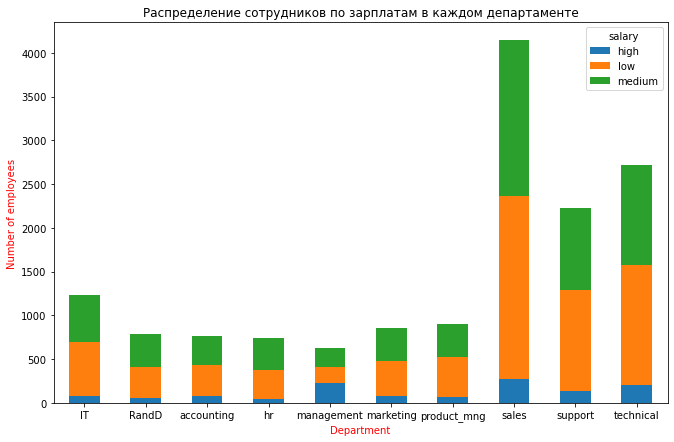

In [10]:
# Дипломная работа Задание 6
"""
Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности.
"""
# группируем по департаменту и зарплате, подситываем количество значений, строим график с накоплением
data.groupby("department")["salary"].value_counts().unstack(level=1).plot(kind="bar", stacked=True)
plt.title("Распределение сотрудников по зарплатам в каждом департаменте")
plt.xticks(rotation=0)
plt.xlabel("Department", color="red")
plt.ylabel("Number of employees", color="red")
plt.show()

p-value res_high: 5.605393417902312e-15
p-value res_low: 7.019524397342306e-41
Значение t-теста Стьюдента 0.4661023478267259


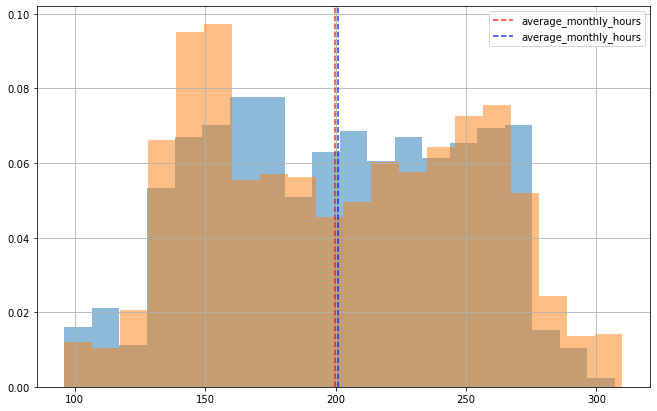

In [13]:
# Дипломная работа Задание 7
"""
Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким
окладом.
"""

# сформулируем гипотезы
# нулевая гипотеза - проведенное на работе время не зависит от уровня заработной платы (при низкой и высокой не отличается)
# альтернативная гипотеза - проведенное на работе время зависит от уровня заработной платы

# выберем 2 датасета, один - часы на работе с высокой зарплатой, другой с низкой
hypo_high = data["average_monthly_hours"][data.salary == "high"]
hypo_low = data["average_monthly_hours"][data.salary == "low"]

# построим 2 гистограммы распределения частоты проведенных часов на работе для выборок с высокой и низкой зарплатой
def two_histograms(x, y):
    """
    Функция, которая построит две гистограммы на одной картинке.
    Дополнительно пунктирными линиями указываются средние значения выборок.
    x: вектор pd.Series,
    y: вектор pd.Series
    """
    # alpha - прозрачность, weights - позволяет задать веса, по которым мы строим гистограмму.
    x.hist(alpha=0.5, weights=[1./len(x)]*len(x), bins=20)  
    y.hist(alpha=0.5, weights=[1./len(y)]*len(y), bins=20)
    plt.axvline(x.mean(), color='red', alpha=0.8, linestyle='dashed')
    plt.axvline(y.mean(), color='blue', alpha=0.8, linestyle='dashed')
    plt.legend([x.name, y.name])

two_histograms(hypo_high, hypo_low)
# графически видим, что среднее значение у обеих выборок практически одинаковое, выбросов ни в одной, 
# ни в другой выборке не видно, однако данные не распределены нормально
 

# дополнительно проверим нормальность распределения данных критерием Шапиро-Уилка

res_high = stats.shapiro(x["average_monthly_hours"])
print("p-value res_high: {0}".format(res_high[1]))
res_low = stats.shapiro(y["average_monthly_hours"])
print("p-value res_low: {0}".format(res_low[1]))
# получаем очень маленькие p-value, делаем вывод распределение нормальное, и возможности использования t-теста Стьюдента

t, p_value = stats.ttest_ind(hypo_high, hypo_low)
print("Значение t-теста Стьюдента " + str(p_value))
# поскольку значение p-value больше заданного уровня, нулевую гипотезу не отвергаем

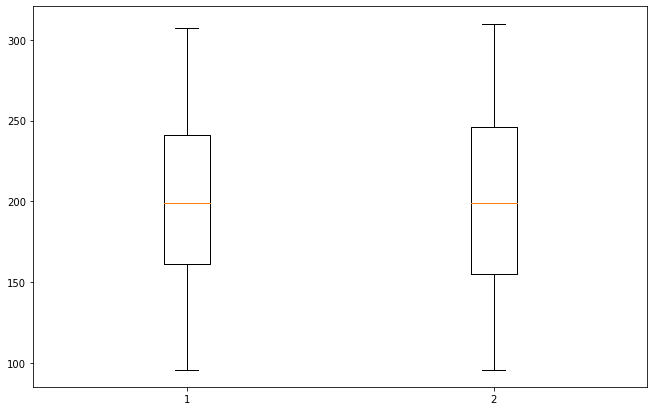

In [14]:
# построим boxplot, видим также, что оба набора данных не отличаются.
plt.boxplot([hypo_high, hypo_low])
plt.show()

In [15]:
# попробуем сделать то же самое через бутстреп

boot_high, boot_low = [], []
np.random.seed(12345)
for _ in range(1000):
    # случайно выдёргиваем точки из hypo_high и hypo_low
    subsample_high = np.random.choice(hypo_high, size=25, replace=True) 
    subsample_low = np.random.choice(hypo_low, size=25, replace=True)
    # собраем статистики средних 
    boot_high.append(subsample_high.mean())
    boot_low.append(subsample_low.mean())
boot_high = pd.Series(boot_high, name='boot_high')
boot_low = pd.Series(boot_low, name='boot_low')
boot_high.name, boot_low.name = 'boot_high', 'boot_low'

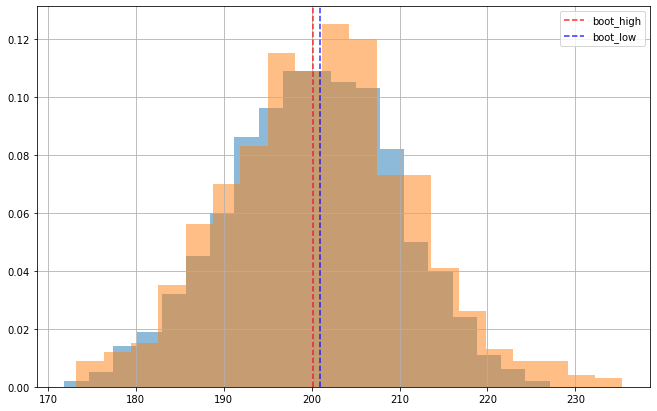

In [16]:
two_histograms(boot_high, boot_low)

95% confidence interval: (-28.328, 26.567)


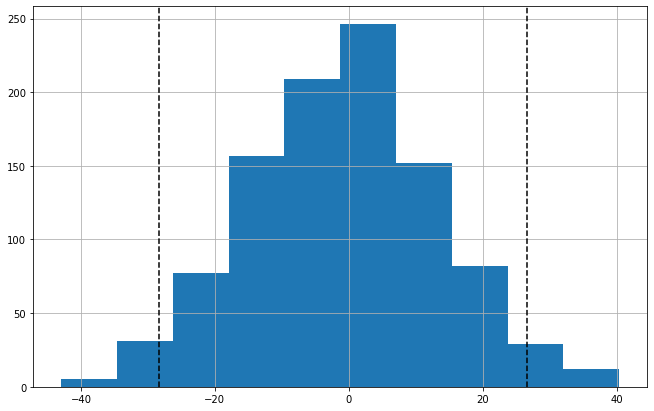

In [17]:
# Чтобы проверить гипотезу о равенстве средних значений, нужно построить доверительный интервал 

delta = boot_high - boot_low 
q_025 = delta.quantile(0.025)
q_975 = delta.quantile(0.975)
delta.hist()
plt.axvline(q_025, linestyle='dashed', color='black')
plt.axvline(q_975, linestyle='dashed', color='black')
print('95% confidence interval: ({0:.3f}, {1:.3f})'.format(q_025, q_975))

# Поскольку ноль попадает в этот интервал, то мы не можем отвергнуть гипотезу H0, следовательно нет оснований полагать,
# что уровень заработной платы влияет на количество времени, проведенного на работе.

In [18]:
# Дипломная работа Задание 8
"""
Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности):
Доля сотрудников с повышением за последние 5 лет
Средняя степень удовлетворенности
Среднее количество проектов
"""

# посчитаем долю оставшихся сотрудников без повышения за последние 5 лет
print("Расчет по оставшимся сотрудникам.")
rest = data[data.left ==0]
rest_no_promo = (data[(data.left == 0) & (data.promotion_last_5years == 0)])
print(f"Доля оставшихся сотрудников без повышения: {len(rest_no_promo)/len(rest):.2%}")
# посчитаем долю оставшихся сотрудников с поавышением за последние 5 лет
rest_promo = (data[(data.left == 0) & (data.promotion_last_5years == 1)])
print(f"Доля оставшихся сотрудников с повышением: {len(rest_promo)/len(rest):.2%}")

# посчитаем среднюю степень удовлетворенности оставшихся сотрудников
print(f"Средняя степень удовлетворенности оставшихся сотрудников: {rest.satisfaction_level.mean():.2%}")

#посчитаем среднее количество проектов оставшихся сотрудников
print(f"Среднее количество проектов оставшихся сотрудников: {rest.number_project.mean():.2f}\n")
    
# аналогичные показатели для уволившихся сотрудников
print("Расчет по уволившимся сотрудникам.")
# посчитаем долю уволившихся сотрудников без повышения за последние 5 лет
left = data[data.left == 1]
left_no_promo = (data[(data.left == 1) & (data.promotion_last_5years == 0)])
print(f"Доля уволившихся сотрудников без повышения: {len(left_no_promo)/len(left):.2%}")
# посчитаем долю уволившихся сотрудников без повышения за последние 5 лет
left_promo = (data[(data.left == 1) & (data.promotion_last_5years == 1)])
print(f"Доля уволившихся сотрудников с поавышением: {len(left_promo)/len(left):.2%}")

# посчитаем среднюю степень удовлетворенности оставшихся сотрудников
print(f"Средняя степень удовлетворенности уволившихся сотрудников: {left.satisfaction_level.mean():.2%}")

#посчитаем среднее количество проектов оставшихся сотрудников
print(f"Среднее количество проектов уволившихся сотрудников: {left.number_project.mean():.2f}\n")

Расчет по оставшимся сотрудникам.
Доля оставшихся сотрудников без повышения: 97.37%
Доля оставшихся сотрудников с повышением: 2.63%
Средняя степень удовлетворенности оставшихся сотрудников: 66.68%
Среднее количество проектов оставшихся сотрудников: 3.79

Расчет по уволившимся сотрудникам.
Доля уволившихся сотрудников без повышения: 99.47%
Доля уволившихся сотрудников с поавышением: 0.53%
Средняя степень удовлетворенности уволившихся сотрудников: 44.01%
Среднее количество проектов уволившихся сотрудников: 3.86



In [19]:
# Дипломная работа Задание 9 Вариант со всеми нормализованными данными.

"""
Разделить данные на тестовую и обучающую выборки Построить модель LDA, предсказывающую уволился ли сотрудник на 
основе имеющихся факторов (кроме department и salary). Оценить качество модели на тестовой выборки.
"""


# поскольку модель строим на датафрейме без department и salary, перед моделированием удаляем эти столбцы. 
moddata = data.drop(data.columns[[6,8,9]], axis=1)
#столбец left, который планируем предсказывать, также удаляем, сохраняем отдельную переменную.
moddata_target = data.left

In [20]:
# нормализуем данные
scaler = MinMaxScaler()



moddata[["satisfaction_level", "last_evaluation", "number_project", "time_spend_company", "average_monthly_hours",
        "Work_accident", "promotion_last_5years"]] = scaler.fit_transform(moddata[["satisfaction_level", "last_evaluation",
                                                                                 "number_project", "time_spend_company",
                                                                                 "average_monthly_hours", 
                                                                                 "Work_accident", 
                                                                                 "promotion_last_5years"]])
moddata

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,promotion_last_5years
0,0.318681,0.265625,0.0,0.285047,0.125,0.0,0.0
1,0.780220,0.781250,0.6,0.775701,0.500,0.0,0.0
2,0.021978,0.812500,1.0,0.822430,0.250,0.0,0.0
3,0.692308,0.796875,0.6,0.593458,0.375,0.0,0.0
4,0.307692,0.250000,0.0,0.294393,0.125,0.0,0.0
...,...,...,...,...,...,...,...
14994,0.340659,0.328125,0.0,0.257009,0.125,0.0,0.0
14995,0.307692,0.187500,0.0,0.299065,0.125,0.0,0.0
14996,0.307692,0.265625,0.0,0.219626,0.125,0.0,0.0
14997,0.021978,0.937500,0.8,0.859813,0.250,0.0,0.0


In [21]:
# теперь данные нормализованы, разбиваем данные на тестовую и контрольную выборку 
X = moddata[["satisfaction_level", "last_evaluation", "number_project", 
           "time_spend_company", "average_monthly_hours", "Work_accident", "promotion_last_5years"]]
y = moddata_target

X_train, X_test, y_train, y_test = train_test_split(moddata, moddata_target, test_size=0.25)

# импортируем lda-функционал
lda = LinearDiscriminantAnalysis()
# обучаем модель
lda.fit(X_train, y_train)

# делаем прогноз на тестовой выборке
lda.predict(X_test)

# смотрим разницу теста и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
result

# теперь нужно оценить точность прогноза

# делаем расчет точности единичный
print(accuracy_score(y_test, lda.predict(X_test)))

# средний из нескольких повторений
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=None)
scores = cross_val_score(lda, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print(np.mean(scores))

# в результате получаем, что на основании всех признаков, кроме department И salary точность предсказания,
# уволится ли сотрудник или нет, составляет 76.16%

0.7650666666666667
0.7616242561707804


In [22]:
# Задание 9 без нормализации

# поскольку модель строим на датафрейме без department и salary, перед моделированием удаляем эти столбцы. 
moddata = data.drop(data.columns[[6,8,9]], axis=1)
#столбец left, который планируем предсказывать, также удаляем, сохраняем отдельную переменную.
moddata_target = data.left

In [23]:
# разбиваем данные на тестовую и контрольную выборку 
X = moddata[["satisfaction_level", "last_evaluation", "number_project", 
           "time_spend_company", "average_monthly_hours", "Work_accident", "promotion_last_5years"]]
y = moddata_target

X_train, X_test, y_train, y_test = train_test_split(moddata, moddata_target, test_size=0.25)

# импортируем lda-функционал
lda = LinearDiscriminantAnalysis()
# обучаем модель
lda.fit(X_train, y_train)

# делаем прогноз на тестовой выборке
lda.predict(X_test)

# смотрим разницу теста и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
result

# теперь нужно оценить точность прогноза

# делаем расчет точности единичный
print(accuracy_score(y_test, lda.predict(X_test)))

# средний из нескольких повторений
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=None)
scores = cross_val_score(lda, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print(np.mean(scores))

# в результате получаем, что на основании всех признаков, кроме department И salary точность предсказания,
# уволится ли сотрудник или нет, составляет 76.16%

0.7682666666666667
0.7616105314654216
